In [1]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:10f}'.format

In [2]:
# читаем данные 
df = pd.read_excel('Regression - test case 1.xlsx')
del df['Unnamed: 0']

In [3]:
# выведем первые 5 значений
df.head()

,Gender,Age,Income,Car cost
0,Female,52,100000,1720000
1,Male,25,56000,1760000
2,Male,33,127000,2010000
3,Female,38,47000,840000
4,Female,31,34000,440000


In [4]:
# Преобразуем пол в бинарный формат
df['Gender'] = np.where(df['Gender']=='Female',1,0)

In [5]:
# Немного описательной статистики
df.describe()

,Gender,Age,Income,Car cost
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.500500,39.978000,109325.500000,1471255.000000
std,0.500125,8.853796,52300.527936,475118.241753
min,0.000000,25.000000,20000.000000,0.000000
25%,0.000000,32.000000,62000.000000,1170000.000000
50%,1.000000,40.000000,110000.000000,1520000.000000
75%,1.000000,48.000000,154000.000000,1812500.000000
max,1.000000,55.000000,200000.000000,2490000.000000


In [6]:
# Видим, что есть нулевые значения в стоимости автомобиля. Удаляем эту запись
df = df[df['Car cost'] > 0]

In [7]:
# Построим графики по каждому признаку
import seaborn as sns
sns.pairplot(df)

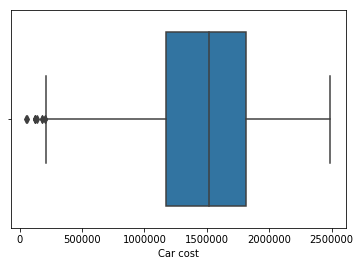

In [8]:
sns.boxplot(df['Car cost']);

In [9]:
 # Сравним среднюю цену на автомобиль в разрезе пола
df.groupby('Gender')['Car cost'].mean()

Gender
0   1637717.717718
1   1306430.000000
Name: Car cost, dtype: float64

In [10]:
# Посчитаем сколько записей есть с суммой менее 200.000
df[df['Car cost']<200000]['Gender'].count()

9

In [11]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

Number of variables,5
Number of observations,1999
Total Missing (%),0.0%
Total size in memory,78.2 KiB
Average record size in memory,40.0 B
Numeric,4
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


#### Как и говорилось ранее, есть сильная зависимоть Income  от Car Cost.  Корреляция  = 0.74. И так же Gender с Car cost разделяются с корреляцией  = 0.34

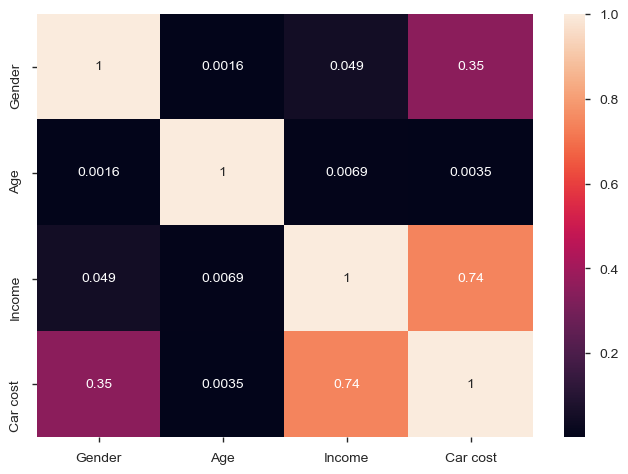

In [12]:
# Построим граффик корреляций.
sns.heatmap(abs(df.corr()), annot=True);

### Построим линейную регрессию

In [15]:
def buld_linear_regression(X_train, X_test, X_valid, y_train, y_test, y_valid):
    
    # Проводим Нормализацию данных
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_valid_scaled = scaler.transform(X_valid)

    # Строим линейную регрессию.

    from sklearn.linear_model import LinearRegression
    model = LinearRegression().fit(X_train_scaled, y_train)

    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    y_pred_valid = model.predict(X_valid_scaled)

    # Считаем метрики
    from sklearn.metrics import mean_squared_error
    from math import sqrt

    rmse_train = sqrt(mean_squared_error(y_train, y_pred_train)) # RMSE трейн
    rmse_test = sqrt(mean_squared_error(y_test, y_pred_test)) # RMSE тест
    rmse_valid = sqrt(mean_squared_error(y_valid, y_pred_valid)) # RMSE на отложенной выборке


    r2_train = model.score(X_train_scaled, y_train) # R2 трейн
    r2_test = model.score(X_test_scaled, y_test) # R2 тест 
    r2_valid = model.score(X_valid_scaled, y_valid) # R2 тест 


    print('R2_train:', r2_train)
    print('R2_test:', r2_test)
    print('R2_valid:', r2_valid)

    print('RMSE_train:', rmse_train)
    print('RMSE_test:', rmse_test)
    print('RMSE_valid:', rmse_valid)

R2_train: 0.560509042264997
R2_test: 0.5621819032165883
R2_valid: 0.563564008225514
RMSE_train: 0.2855800708398006
RMSE_test: 0.2624280260966663
RMSE_valid: 0.2743976888751241


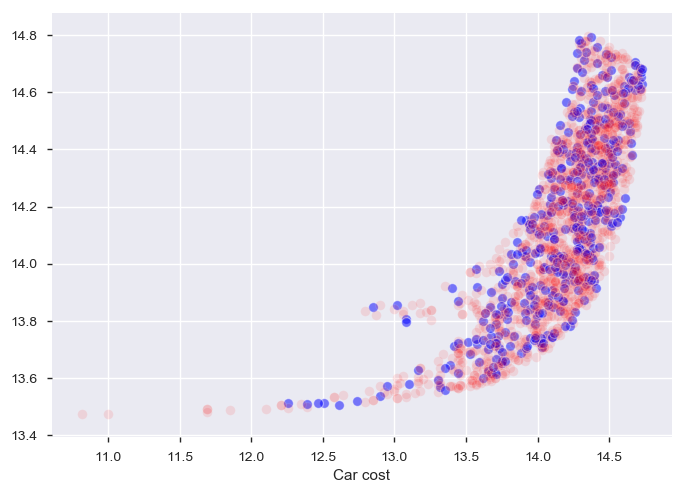

In [18]:
# Выделяем  Обучающие данные
X = df.drop('Car cost', axis=1)

#  Выделяем таргет и сразу его логорифмируем
y= np.log(df['Car cost'])

# Делим на трейн и валидацию
from sklearn.model_selection import train_test_split
X_, X_valid, y_, y_valid = train_test_split(X, y, test_size=0.13, random_state=42)

# Делим трейн на трейн и тест
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.23, random_state=42)

# Строим регрессию
buld_linear_regression(X_train, X_test, X_valid, y_train, y_test, y_valid)

# Построим график
sns.scatterplot(y_test, y_pred_test, c = ['b'], alpha=0.5, marker = 'o', legend="full")
sns.scatterplot(y_train, y_pred_train, c = ['r'], alpha=0.1, marker = 'o', legend="full");

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


R2_train: 0.560509042264997
R2_test: 0.5621819032165883
R2_valid: 0.563564008225514
RMSE_train: 0.2855800708398006
RMSE_test: 0.2624280260966663
RMSE_valid: 0.2743976888751241


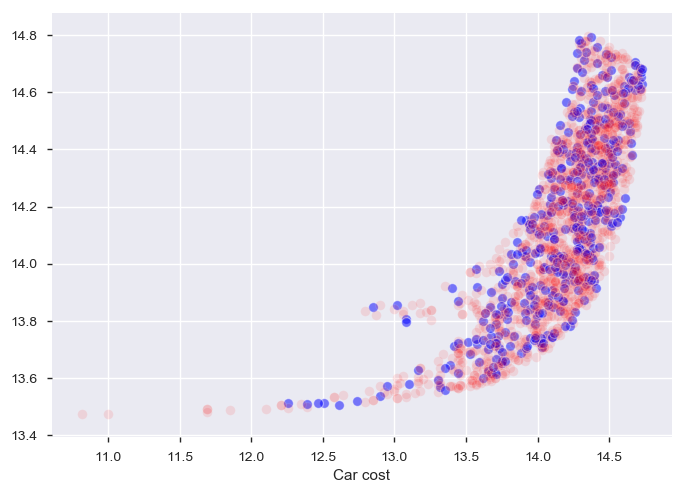

In [14]:
# Выделяем  Обучающие данные
X = df.drop('Car cost', axis=1)

#  Выделяем таргет и сразу его логорифмируем
y= np.log(df['Car cost'])

# Делим на трейн и валидацию
from sklearn.model_selection import train_test_split
X_, X_valid, y_, y_valid = train_test_split(X, y, test_size=0.13, random_state=42)

# Делим трейн на трейн и тест
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.23, random_state=42)


# Проводим Нормализацию данных
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_valid_scaled = scaler.transform(X_valid)

# Строим линейную регрессию.

from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train_scaled, y_train)

y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)
y_pred_valid = model.predict(X_valid_scaled)

# Считаем метрики
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_train = sqrt(mean_squared_error(y_train, y_pred_train)) # RMSE трейн
rmse_test = sqrt(mean_squared_error(y_test, y_pred_test)) # RMSE тест
rmse_valid = sqrt(mean_squared_error(y_valid, y_pred_valid)) # RMSE на отложенной выборке


r2_train = model.score(X_train_scaled, y_train) # R2 трейн
r2_test = model.score(X_test_scaled, y_test) # R2 тест 
r2_valid = model.score(X_valid_scaled, y_valid) # R2 тест 


print('R2_train:', r2_train)
print('R2_test:', r2_test)
print('R2_valid:', r2_valid)

print('RMSE_train:', rmse_train)
print('RMSE_test:', rmse_test)
print('RMSE_valid:', rmse_valid)



# Построим график
sns.scatterplot(y_test, y_pred_test, c = ['b'], alpha=0.5, marker = 'o', legend="full")
sns.scatterplot(y_train, y_pred_train, c = ['r'], alpha=0.1, marker = 'o', legend="full");

### Попробуем улучшить результат с помощью полиномиальных признаков.

In [14]:
X = df.drop('Car cost', axis=1)

# Прологарифмируем переменные
#X['Age'] = np.log(X['Age'])
#X['Income'] = np.log(X['Income'])

#  Перемножим и возведем во 2 степень
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
Xx = poly.fit_transform(X)

Xx = pd.DataFrame(Xx)
Xx.columns = poly.get_feature_names(input_features = X.columns)
del Xx['1'], Xx['Gender^2']
Xx.head()

,Gender,Age,Income,Gender Age,Gender Income,Age^2,Age Income,Income^2
0,1.000000,52.000000,100000.000000,52.000000,100000.000000,2704.000000,5200000.000000,10000000000.000000
1,0.000000,25.000000,56000.000000,0.000000,0.000000,625.000000,1400000.000000,3136000000.000000
2,0.000000,33.000000,127000.000000,0.000000,0.000000,1089.000000,4191000.000000,16129000000.000000
3,1.000000,38.000000,47000.000000,38.000000,47000.000000,1444.000000,1786000.000000,2209000000.000000
4,1.000000,31.000000,34000.000000,31.000000,34000.000000,961.000000,1054000.000000,1156000000.000000


R2_train: 0.8996781113160613
R2_test: 0.9160651181233619
RMSE_train: 0.13466910425531145
RMSE_test: 0.12051815804306641


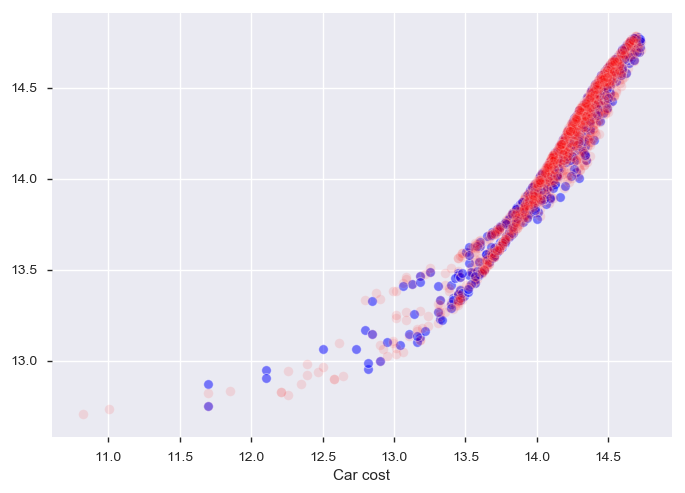

In [15]:
#  Выделяем таргет и сразу его логорифмируем
y= np.log(df['Car cost'])

# Делим на трейн и тест
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xx, y, test_size=0.33, random_state=42)

# Проводим Нормализацию данных
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Строим линейную регрессию.

from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train_scaled, y_train)

y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# Считаем метрики
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_train = sqrt(mean_squared_error(y_train, y_pred_train)) # RMSE трейн
rmse_test = sqrt(mean_squared_error(y_test, y_pred_test)) # RMSE тест

r2_train = model.score(X_train_scaled, y_train) # R2 трейн
r2_test = model.score(X_test_scaled, y_test) # R2 тест 

print('R2_train:', r2_train)
print('R2_test:', r2_test)
print('RMSE_train:', rmse_train)
print('RMSE_test:', rmse_test)


# Построим график
sns.scatterplot(y_test, y_pred_test, c = ['b'], alpha=0.5, marker = 'o', legend="full")
sns.scatterplot(y_train, y_pred_train, c = ['r'], alpha=0.1, marker = 'o', legend="full");

In [16]:
model.coef_, Xx.columns

(array([-1.1739425 ,  0.16242069,  0.92333528,  1.00857317,  0.10076535,
        -0.29607686, -0.11189649, -0.59059331]),
 Index(['Gender', 'Age', 'Income', 'Gender Age', 'Gender Income', 'Age^2',
        'Age Income', 'Income^2'],
       dtype='object'))

In [17]:
model.intercept_

14.127530013137264

# Уравнение линейной регрессии получается :

C полиномом 3 степени результат будет еще выше, но модель станет сложнее, и будет более склонна к переобучению в будующем

R2_train: 0.8894082776247026
R2_test: 0.883617806793896
RMSE_train: 156149.59330941815
RMSE_test: 164651.4959195277


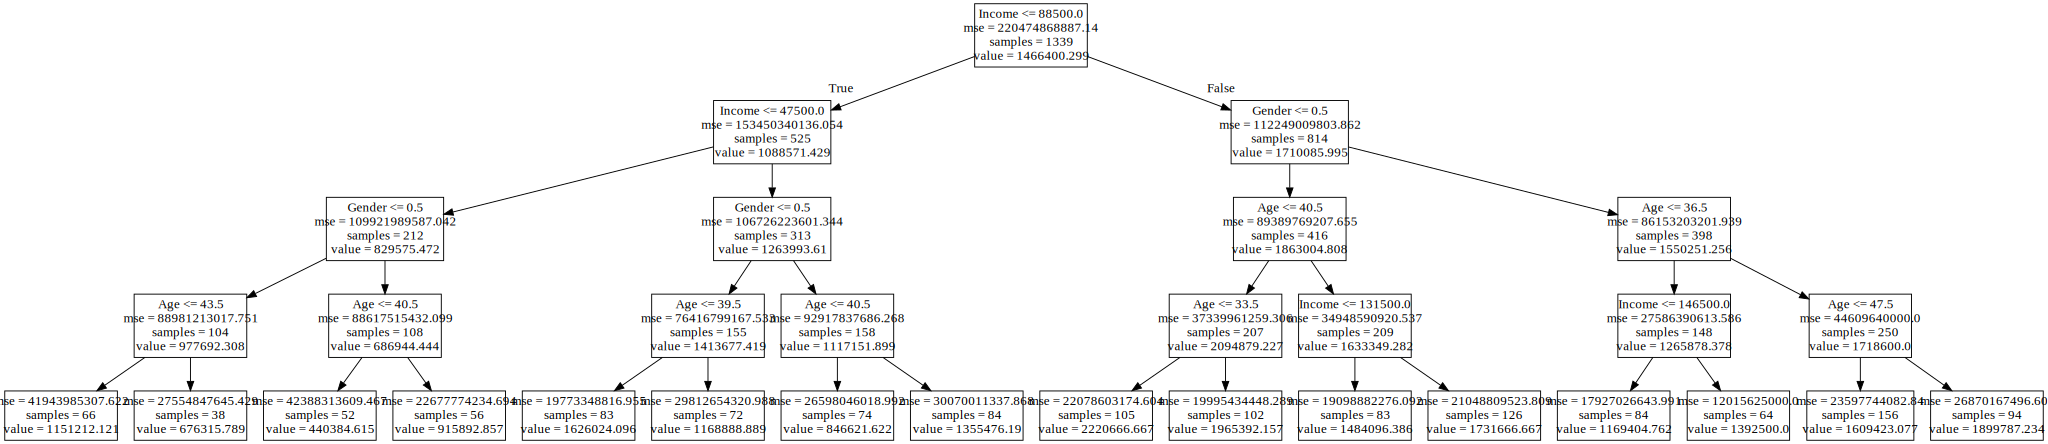

In [18]:
from sklearn.tree import DecisionTreeRegressor

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
X = df.drop('Car cost', axis=1)
y= df['Car cost']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

tree = DecisionTreeRegressor(max_depth=4)
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

# Считаем метрики
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_train = sqrt(mean_squared_error(y_train, y_pred_train)) # RMSE трейн
rmse_test = sqrt(mean_squared_error(y_test, y_pred_test)) # RMSE тест

r2_train = tree.score(X_train, y_train) # R2 трейн
r2_test = tree.score(X_test, y_test) # R2 тест 

print('R2_train:', r2_train)
print('R2_test:', r2_test)
print('RMSE_train:', rmse_train)
print('RMSE_test:', rmse_test)

from graphviz import Source
from IPython.display import SVG
from sklearn.tree import export_graphviz

#export_graphviz(tree, out_file='small_tree.dot', feature_names=X_train.columns)
graph = Source( export_graphviz(tree, out_file=None, feature_names=X_train.columns))
SVG(graph.pipe(format='svg'))
